## Bike sharing problem using Multi Linear Regression 
### 1. Which variables are significant in predicting the demand for shared bikes.
### 2. How well those variables describe the bike demands

In [1]:
#Load the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
df = pd.read_csv("day.csv")

In [3]:
df_all = pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# rows: 730, columns: 16
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)
# no missing values

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [9]:
# Checking for duplicates and dropping the entire duplicate row if any
df.drop_duplicates(subset=None, inplace=True)

In [10]:
df.shape
# no duplicate found

(730, 16)

In [11]:
df["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [13]:
df["mnth"].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [14]:
df["weekday"].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [15]:
df["workingday"].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [16]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [17]:
# drop columns which are not useful for the given problem
# instant - index value not needed
# dteday - covered in month and year
# casual,registered are subcategirs for cnt value, not needed 
columns_to_drop = ["instant", "dteday", "casual", "registered"]
df.drop(columns=columns_to_drop, inplace=True)

In [18]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [19]:
# Convert to 'season', 'mnth', 'weekday', 'weathersit',  to category data type as the actual continuous number does not make sense
df['season'] = df['season'].astype('category')
df['mnth'] = df['mnth'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')

In [20]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12         730 non-null uint8
weekday_1       730 non-null uint8
weekday_2       730 non-null uint8
weekday_3       730 non-null uint8
weekday_4   

In [21]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [22]:
# split train and test data
df_train, df_test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state = 100)

In [23]:
df_train.shape

(510, 30)

In [24]:
df_test.shape

(219, 30)

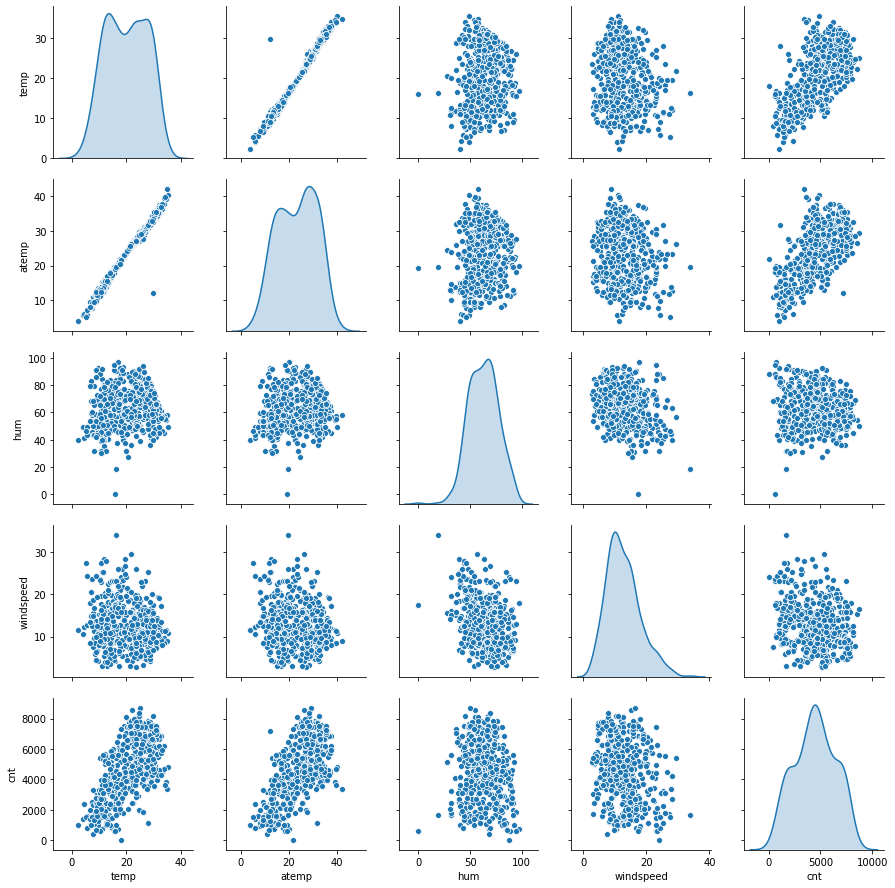

In [25]:
# pair plot for numeric columns
df_train_numeric = df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(df_train_numeric, diag_kind='kde')
plt.show()

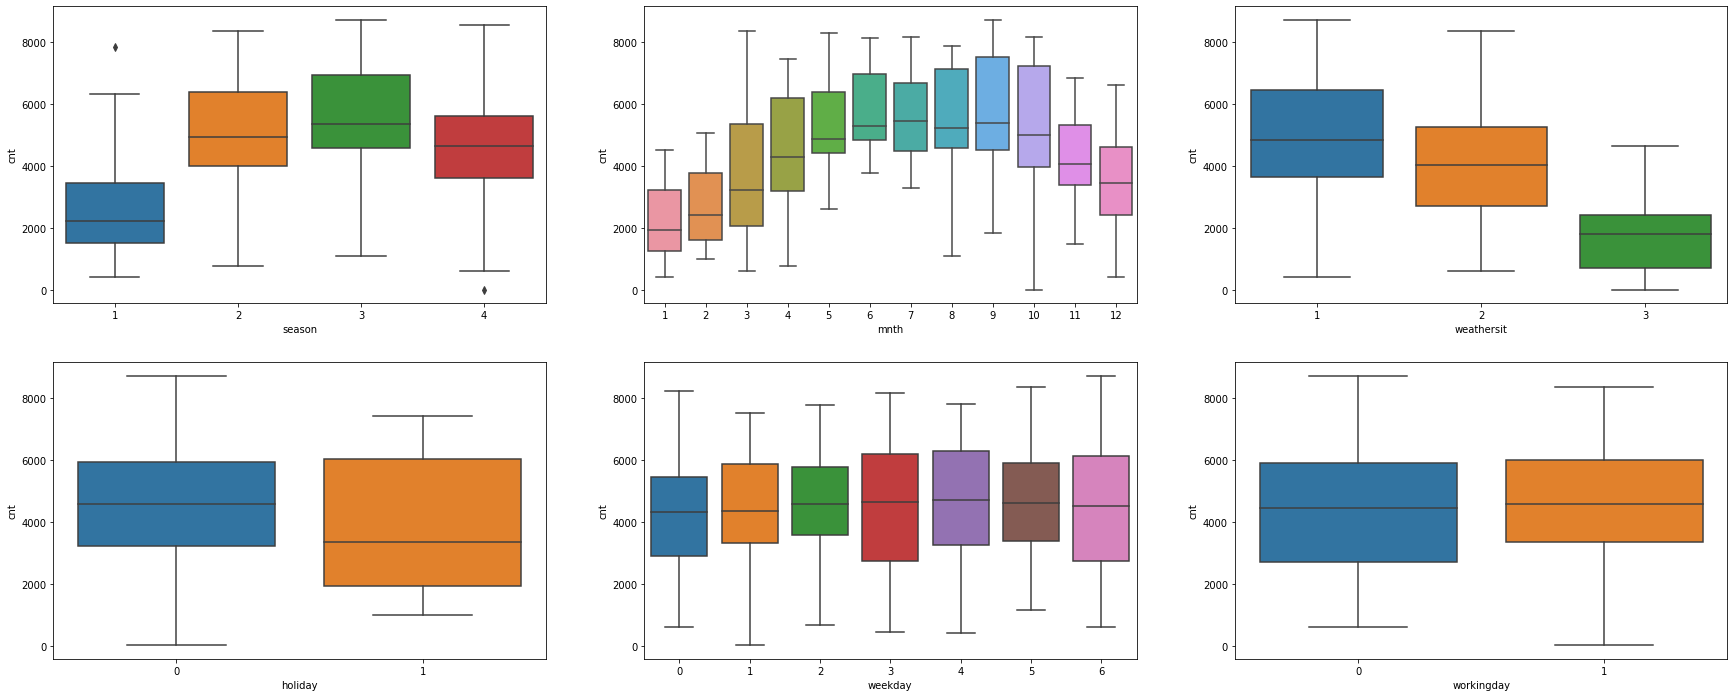

In [26]:
plt.figure(figsize=(30, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_all)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_all)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_all)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_all)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_all)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_all)
plt.show()

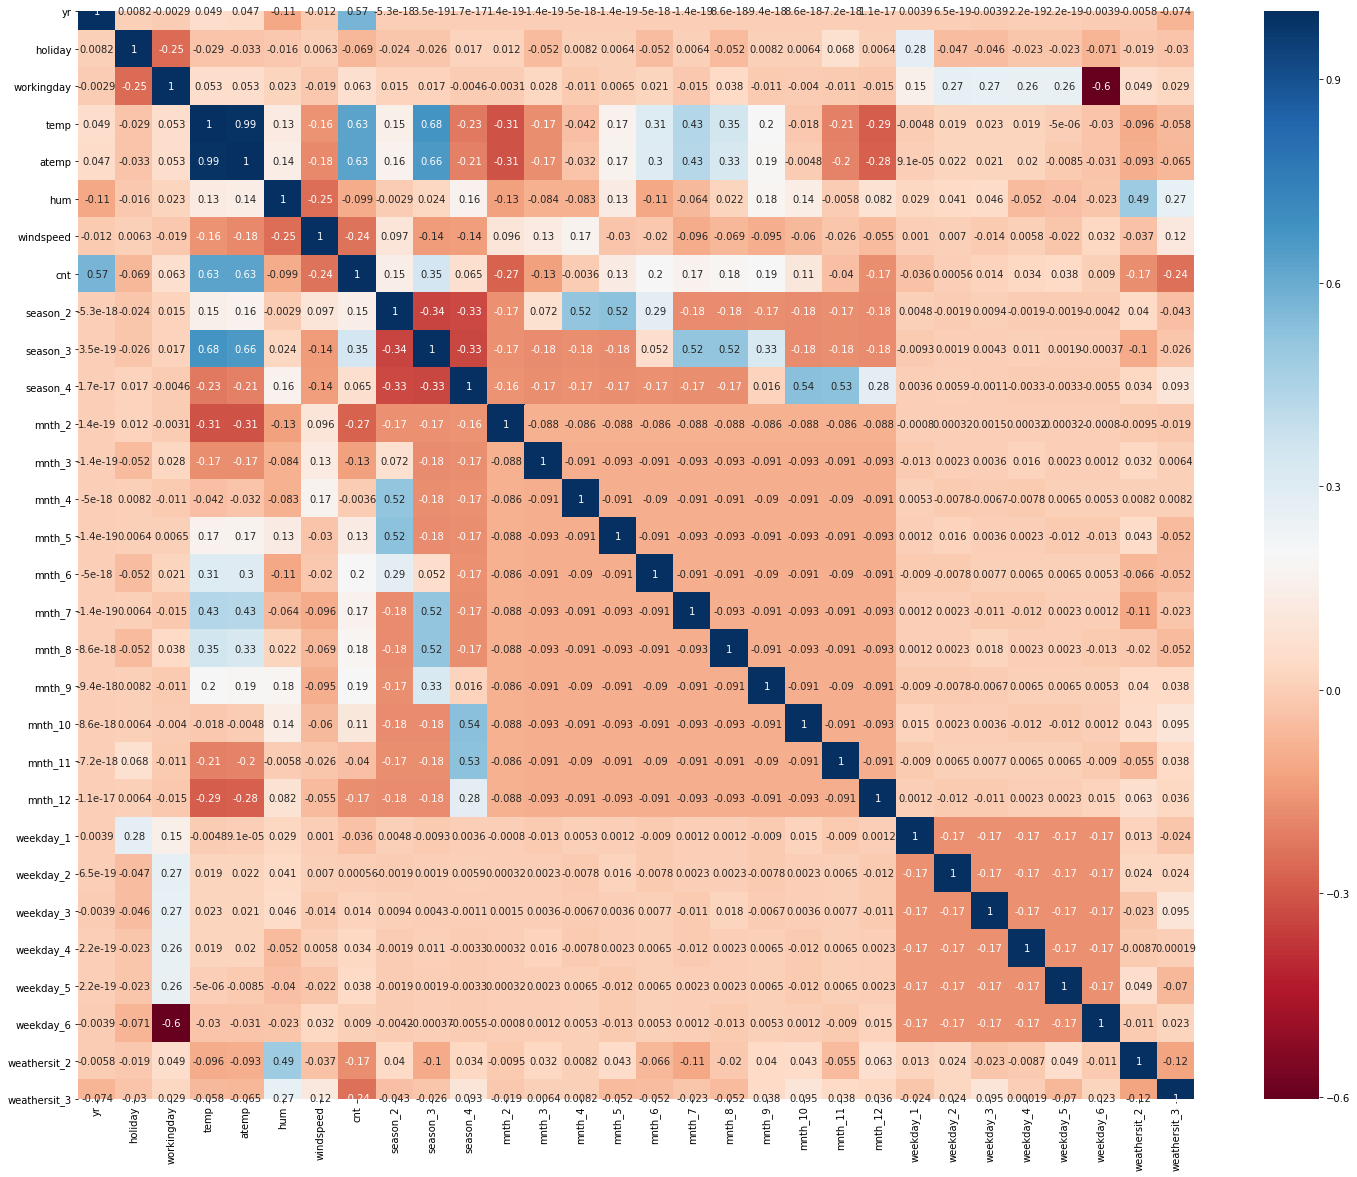

In [27]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()
#  target variable cnt, has high correlation wiht temp, atemp, yr  

In [28]:
# scaler 
scaler = MinMaxScaler()

In [29]:
numeric_col = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[numeric_col] = scaler.fit_transform(df_train[numeric_col])

In [30]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,1,0


In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
X_train.shape

(510, 29)

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

#initially considering all features
rfe = RFE(lm, 29)  # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [36]:
def VIF(df) :
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [37]:
def statmodel(X) :
    # Add a constant
    X_cons = sm.add_constant(X)
    # Create a first fitted model
    lr = sm.OLS(y_train, X_cons).fit()
    return lr

In [38]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [39]:
vif = VIF(X_train)
print(vif)
model = statmodel(X_train)
print(model.summary())

        Features     VIF
24     weekday_4     inf
2     workingday     inf
23     weekday_3     inf
22     weekday_2     inf
21     weekday_1     inf
25     weekday_5     inf
1        holiday     inf
3           temp  447.70
4          atemp  383.54
5            hum   20.79
8       season_3   15.42
16        mnth_8   11.01
9       season_4   10.93
15        mnth_7    9.62
7       season_2    8.88
14        mnth_6    7.35
17        mnth_9    7.34
13        mnth_5    7.16
18       mnth_10    6.64
19       mnth_11    5.99
12        mnth_4    5.64
6      windspeed    4.71
20       mnth_12    3.78
11        mnth_3    3.06
27  weathersit_2    2.21
0             yr    2.09
26     weekday_6    1.93
10        mnth_2    1.71
28  weathersit_3    1.23
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:      

In [40]:
# drop weekday_4 because of high VIF & P value
X_train_new = X_train.drop(["weekday_4"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features     VIF
3           temp  447.70
4          atemp  383.54
5            hum   20.79
8       season_3   15.42
16        mnth_8   11.01
9       season_4   10.93
15        mnth_7    9.62
2     workingday    9.30
7       season_2    8.88
14        mnth_6    7.35
17        mnth_9    7.34
13        mnth_5    7.16
18       mnth_10    6.64
19       mnth_11    5.99
12        mnth_4    5.64
6      windspeed    4.71
20       mnth_12    3.78
11        mnth_3    3.06
21     weekday_1    2.25
23     weekday_3    2.22
26  weathersit_2    2.21
0             yr    2.09
22     weekday_2    2.03
24     weekday_5    2.02
25     weekday_6    1.93
10        mnth_2    1.71
1        holiday    1.46
27  weathersit_3    1.23
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares 

In [41]:
# drop "atemp"
X_train_new = X_train_new.drop(["atemp"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  47.06
4            hum  20.65
7       season_3  15.40
8       season_4  10.93
15        mnth_8  10.91
14        mnth_7   9.60
2     workingday   9.30
6       season_2   8.88
16        mnth_9   7.33
13        mnth_6   7.31
12        mnth_5   7.15
17       mnth_10   6.64
18       mnth_11   5.99
11        mnth_4   5.64
5      windspeed   4.47
19       mnth_12   3.78
10        mnth_3   3.06
20     weekday_1   2.25
22     weekday_3   2.22
25  weathersit_2   2.21
0             yr   2.09
21     weekday_2   2.03
23     weekday_5   2.00
24     weekday_6   1.93
9         mnth_2   1.71
1        holiday   1.46
26  weathersit_3   1.22
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:       

In [42]:
# drop "season_3"
X_train_new = X_train_new.drop(["season_3"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  46.33
4            hum  20.60
2     workingday   9.28
7       season_4   8.09
11        mnth_5   6.56
14        mnth_8   6.49
6       season_2   6.25
13        mnth_7   6.17
12        mnth_6   6.08
16       mnth_10   5.90
17       mnth_11   5.15
10        mnth_4   4.97
5      windspeed   4.44
15        mnth_9   4.44
18       mnth_12   3.38
9         mnth_3   2.98
19     weekday_1   2.25
21     weekday_3   2.22
24  weathersit_2   2.21
0             yr   2.09
20     weekday_2   2.03
22     weekday_5   2.00
23     weekday_6   1.93
8         mnth_2   1.71
1        holiday   1.46
25  weathersit_3   1.21
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 31 Jul 202

In [43]:
# drop "hum"
X_train_new = X_train_new.drop(["hum"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  35.18
2     workingday   8.95
6       season_4   8.08
10        mnth_5   6.52
13        mnth_8   6.31
5       season_2   6.22
12        mnth_7   5.94
15       mnth_10   5.90
11        mnth_6   5.87
16       mnth_11   5.11
9         mnth_4   4.94
14        mnth_9   4.42
4      windspeed   4.39
17       mnth_12   3.26
8         mnth_3   2.97
18     weekday_1   2.24
20     weekday_3   2.22
0             yr   2.09
19     weekday_2   2.03
21     weekday_5   2.00
22     weekday_6   1.85
7         mnth_2   1.65
23  weathersit_2   1.58
1        holiday   1.45
24  weathersit_3   1.12
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     107.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic): 

In [44]:
# drop "weekday_1"
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

In [45]:
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  35.11
6       season_4   8.05
10        mnth_5   6.52
2     workingday   6.31
13        mnth_8   6.31
5       season_2   6.22
12        mnth_7   5.93
15       mnth_10   5.90
11        mnth_6   5.87
16       mnth_11   5.10
9         mnth_4   4.94
14        mnth_9   4.42
4      windspeed   4.39
17       mnth_12   3.26
8         mnth_3   2.97
0             yr   2.08
21     weekday_6   1.85
7         mnth_2   1.65
19     weekday_3   1.62
22  weathersit_2   1.58
18     weekday_2   1.52
20     weekday_5   1.50
1        holiday   1.18
23  weathersit_3   1.12
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     112.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.01e-180
Time:

In [46]:
# drop "weekday_4"
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  35.10
6       season_4   8.05
10        mnth_5   6.52
13        mnth_8   6.31
5       season_2   6.22
12        mnth_7   5.93
15       mnth_10   5.90
11        mnth_6   5.87
2     workingday   5.47
16       mnth_11   5.10
9         mnth_4   4.94
14        mnth_9   4.42
4      windspeed   4.39
17       mnth_12   3.25
8         mnth_3   2.97
0             yr   2.08
20     weekday_6   1.85
7         mnth_2   1.65
21  weathersit_2   1.58
18     weekday_3   1.42
19     weekday_5   1.33
1        holiday   1.18
22  weathersit_3   1.11
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.74e-182
Time:                        

In [47]:
# drop "weekday_3"  high p value
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)

In [48]:
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  35.10
6       season_4   8.05
10        mnth_5   6.52
13        mnth_8   6.31
5       season_2   6.22
12        mnth_7   5.92
15       mnth_10   5.90
11        mnth_6   5.87
16       mnth_11   5.10
2     workingday   4.99
9         mnth_4   4.94
14        mnth_9   4.42
4      windspeed   4.39
17       mnth_12   3.25
8         mnth_3   2.97
0             yr   2.08
19     weekday_6   1.85
7         mnth_2   1.65
20  weathersit_2   1.57
18     weekday_5   1.25
1        holiday   1.18
21  weathersit_3   1.11
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     122.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.24e-182
Time:                        21:43:37   Log-Likelihoo

In [49]:
# drop "mnth_12"
X_train_new = X_train_new.drop(["mnth_12"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  30.16
5       season_2   6.22
10        mnth_5   5.72
13        mnth_8   5.13
11        mnth_6   4.96
2     workingday   4.95
12        mnth_7   4.88
6       season_4   4.68
9         mnth_4   4.41
4      windspeed   4.29
14        mnth_9   3.19
15       mnth_10   2.64
8         mnth_3   2.51
16       mnth_11   2.33
0             yr   2.08
18     weekday_6   1.83
19  weathersit_2   1.57
7         mnth_2   1.47
17     weekday_5   1.25
1        holiday   1.18
20  weathersit_3   1.11
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.13e-183
Time:                        21:43:37   Log-Likelihood:                 516.6

In [50]:
# drop "mnth_11"
X_train_new = X_train_new.drop(["mnth_11"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  29.43
5       season_2   6.21
10        mnth_5   5.64
13        mnth_8   5.01
2     workingday   4.94
11        mnth_6   4.86
12        mnth_7   4.76
9         mnth_4   4.36
4      windspeed   4.26
6       season_4   3.33
14        mnth_9   3.01
8         mnth_3   2.47
0             yr   2.07
17     weekday_6   1.82
15       mnth_10   1.81
18  weathersit_2   1.57
7         mnth_2   1.45
16     weekday_5   1.24
1        holiday   1.17
19  weathersit_3   1.11
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     134.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.81e-184
Time:                        21:43:37   Log-Likelihood:                 516.20
No. Observations:     

In [51]:
# drop "weekday_5"
X_train_new = X_train_new.drop(["weekday_5"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  29.43
5       season_2   6.21
10        mnth_5   5.63
13        mnth_8   5.01
11        mnth_6   4.86
12        mnth_7   4.76
2     workingday   4.70
9         mnth_4   4.36
4      windspeed   4.26
6       season_4   3.33
14        mnth_9   3.01
8         mnth_3   2.47
0             yr   2.07
16     weekday_6   1.82
15       mnth_10   1.81
17  weathersit_2   1.56
7         mnth_2   1.45
1        holiday   1.17
18  weathersit_3   1.10
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     141.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.20e-185
Time:                        21:43:37   Log-Likelihood:                 515.36
No. Observations:                 510   AIC:  

In [52]:
# drop "season_2"
X_train_new = X_train_new.drop(["season_2"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  29.28
12        mnth_8   4.99
11        mnth_7   4.74
2     workingday   4.70
4      windspeed   4.26
10        mnth_6   3.89
5       season_4   3.33
9         mnth_5   3.23
13        mnth_9   3.01
8         mnth_4   2.20
7         mnth_3   2.09
0             yr   2.07
15     weekday_6   1.82
14       mnth_10   1.81
16  weathersit_2   1.56
6         mnth_2   1.45
1        holiday   1.17
17  weathersit_3   1.10
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.30e-184
Time:                        21:43:37   Log-Likelihood:                 510.79
No. Observations:                 510   AIC:                          

In [53]:
# drop "mnth_8"
X_train_new = X_train_new.drop(["mnth_2"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
3           temp  27.50
2     workingday   4.64
11        mnth_8   4.40
10        mnth_7   4.23
4      windspeed   4.05
9         mnth_6   3.45
5       season_4   2.86
8         mnth_5   2.84
12        mnth_9   2.71
0             yr   2.07
7         mnth_4   1.89
14     weekday_6   1.81
6         mnth_3   1.79
13       mnth_10   1.79
15  weathersit_2   1.55
1        holiday   1.17
16  weathersit_3   1.10
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.98e-185
Time:                        21:43:37   Log-Likelihood:                 509.93
No. Observations:                 510   AIC:                            -983.9
Df Residuals:  

In [54]:
# drop "holiday"
X_train_new = X_train_new.drop(["holiday"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features    VIF
2           temp  25.99
10        mnth_8   4.27
1     workingday   4.24
9         mnth_7   4.09
3      windspeed   3.99
8         mnth_6   3.34
4       season_4   2.86
7         mnth_5   2.77
11        mnth_9   2.68
0             yr   2.07
6         mnth_4   1.87
5         mnth_3   1.77
12       mnth_10   1.76
13     weekday_6   1.72
14  weathersit_2   1.55
15  weathersit_3   1.10
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     163.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.52e-185
Time:                        21:43:37   Log-Likelihood:                 508.68
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     493  

In [55]:
# drop "mnth_7"
X_train_new = X_train_new.drop(["mnth_7"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features   VIF
2           temp  7.90
1     workingday  4.16
3      windspeed  3.76
4       season_4  2.12
0             yr  2.04
9         mnth_8  1.82
12     weekday_6  1.72
11       mnth_10  1.62
8         mnth_6  1.58
13  weathersit_2  1.55
7         mnth_5  1.48
10        mnth_9  1.45
5         mnth_3  1.36
6         mnth_4  1.33
14  weathersit_3  1.10
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.49e-185
Time:                        21:43:37   Log-Likelihood:                 506.00
No. Observations:                 510   AIC:                            -980.0
Df Residuals:                     494   BIC:                            -912.3


In [56]:
# drop "holiday"
# X_train_new = X_train_new.drop(["holiday"], axis = 1)
# vif = VIF(X_train_new)
# print(vif)
# model = statmodel(X_train_new)
# print(model.summary())

In [57]:
# drop "mnth_6"
X_train_new = X_train_new.drop(["mnth_6"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features   VIF
2           temp  6.02
1     workingday  4.16
3      windspeed  3.75
0             yr  2.04
4       season_4  2.01
11     weekday_6  1.72
10       mnth_10  1.61
12  weathersit_2  1.55
8         mnth_8  1.53
7         mnth_5  1.32
9         mnth_9  1.30
5         mnth_3  1.29
6         mnth_4  1.26
13  weathersit_3  1.10
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.31e-182
Time:                        21:43:37   Log-Likelihood:                 495.67
No. Observations:                 510   AIC:                            -961.3
Df Residuals:                     495   BIC:                            -897.8
Df Model:              

In [58]:
# drop "workingday"
X_train_new = X_train_new.drop(["workingday"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features   VIF
1           temp  4.84
2      windspeed  3.49
0             yr  2.02
3       season_4  1.95
9        mnth_10  1.59
7         mnth_8  1.53
11  weathersit_2  1.50
6         mnth_5  1.32
8         mnth_9  1.30
4         mnth_3  1.26
5         mnth_4  1.25
10     weekday_6  1.18
12  weathersit_3  1.09
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.80e-178
Time:                        21:43:37   Log-Likelihood:                 483.69
No. Observations:                 510   AIC:                            -939.4
Df Residuals:                     496   BIC:                            -880.1
Df Model:                          13         

In [59]:
# drop "mnth_10"
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)
vif = VIF(X_train_new)
print(vif)
model = statmodel(X_train_new)
print(model.summary())

        Features   VIF
1           temp  4.75
2      windspeed  3.48
0             yr  2.02
7         mnth_8  1.52
10  weathersit_2  1.50
3       season_4  1.48
6         mnth_5  1.31
8         mnth_9  1.28
4         mnth_3  1.26
5         mnth_4  1.25
9      weekday_6  1.18
11  weathersit_3  1.08
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.88e-179
Time:                        21:43:38   Log-Likelihood:                 482.29
No. Observations:                 510   AIC:                            -938.6
Df Residuals:                     497   BIC:                            -883.5
Df Model:                          12                                

In [60]:
model.params

const           0.112477
yr              0.231963
temp            0.558246
windspeed      -0.160546
season_4        0.134352
mnth_3          0.057424
mnth_4          0.099410
mnth_5          0.095459
mnth_8          0.038053
mnth_9          0.100683
weekday_6       0.023763
weathersit_2   -0.079211
weathersit_3   -0.281078
dtype: float64

In [61]:
X_train_new.shape

(510, 12)

In [62]:
X_train_cons = sm.add_constant(X_train_new)
y_train_pred = model.predict(X_train_cons)

Text(0.5, 0, 'Errors')

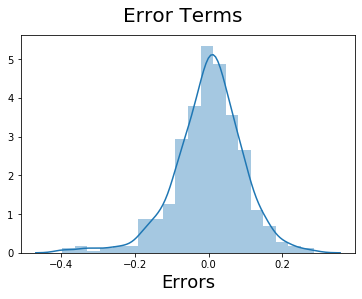

In [63]:
res = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [64]:
# residulas are normally destributed

In [65]:
num_col = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_col] = scaler.transform(df_test[num_col])

In [66]:
df_test.shape

(219, 30)

In [67]:
y_test = df_test.pop('cnt')
X_test = df_test
# X_test.info()

In [68]:
#Selecting the variables that were part of final model.
col1 = X_train_new.columns
X_test = X_test[col1]
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
# X_test_lm.info()

In [69]:
X_train_new.columns

Index(['yr', 'temp', 'windspeed', 'season_4', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_8', 'mnth_9', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [70]:
y_test_pred = model.predict(X_test_lm)

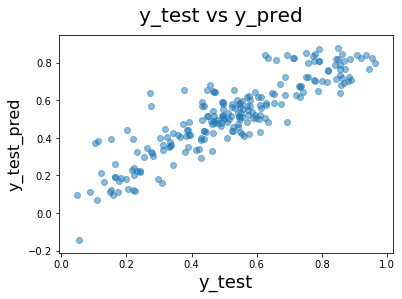

In [71]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [72]:

r2_score(y_test, y_test_pred)

0.7855126301540128

r2 = 0.789 is good and all p values are < 0.05

In [73]:
r2 = 0.789

In [74]:
# n is number of rows in X
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

0.7767087378640777


model
 0.112477 + yr * 0.231963 + temp * 0.558246 + windspeed * -0.160546 + season_4 * 0.134352 +
mnth_3 * 0.057424 + mnth_4 * 0.099410 + mnth_5 * 0.095459 + mnth_8 * 0.038053 + mnth_9 * 0.100683 +
weekday_6 * 0.023763 + weathersit_2 * -0.079211 + weathersit_3 * -0.281078